## Spectral Scaling

### Import Necessary Packages and Functions

In [1]:
import numpy as np
from numpy import sqrt
import matplotlib
from matplotlib import pyplot as plt

In [2]:
## Load ground motion record
record = np.loadtxt('elcentro.txt')
record[:,1] = np.array(record[:,1])*32.174049*12 #time history was given in g - so convert to in/s^2

### Unscaled Response

0.14635772368605712


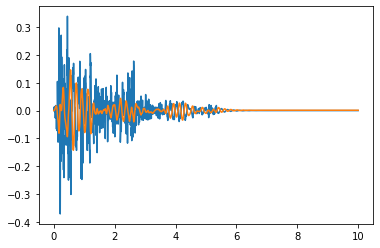

In [3]:
## Initial Conditions
f0=0 # magnitude of force
u0=0 #initial displacement
v0=0 # initial velocity
a0=0
ui=u0
dudti=v0
dudt2i=a0
u = [u0]
dudt = [v0]
dudt2 = [a0]

Tn=0.2
wn=2*np.pi/Tn
m=50
k=wn**2*m
xi=0.05
c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
wd = wn*sqrt(1.0-xi**2.0)
##Newmark Beta Variables - Based on Linear Acceleration Method
gamma = 1/2
beta = 1/6
T1=10 #duration of motion evaluation
dt=0.002 #time step
N=int(T1/dt) #total number of time points
t=np.arange(0.0,T1,dt) #generate time vector
f = np.zeros(N)
Df = np.zeros(N)

## Newmark-Beta Method (Forced)
Kbar = k + m/(beta*(dt**2)) + c*gamma/(beta*dt)

for i in range (1,N):
    if i < (len(record)-1):
        Dfi = -m * (record[i,1]-record[i-1,1])
    else:
        Dfi = 0
    DFbar = Dfi + ((m/(2*beta)) + c*dt*(1-gamma/(2*beta)))*dudt2i + ((1/(beta*dt))*m+(gamma/beta)*c)*dudti
    Dui = DFbar/Kbar
    Ddudt2i = (1/(beta*dt*dt))*Dui - (1/(beta*dt))*dudti - (1/(2*beta))*dudt2i
    Ddudti = dudt2i*dt+gamma*Ddudt2i*dt  
    ui = Dui + ui
    dudti = Ddudti + dudti
    dudt2i = Ddudt2i + dudt2i
    u.append(ui)
    dudt.append(dudti)
    dudt2.append(dudt2i)

maxdisp=np.max(u)
maxaccel=np.max(dudt2)
Sa=(maxdisp*((2*np.pi/Tn)**2))/32.174049/12
print(Sa)
a=np.array(u)*((2*np.pi/Tn)**2)/32.174049/12
dudt2=np.array(dudt2)/32.174049/12

plt.plot(t,dudt2)
plt.plot(t,a)

### Scale Record

In [5]:
SDS = 1 #Design spectral acceleration
DR = SDS/Sa #Design Ratio
print(DR)

6.832574153346618


In [6]:
scaledrecord = record[:,1]*DR

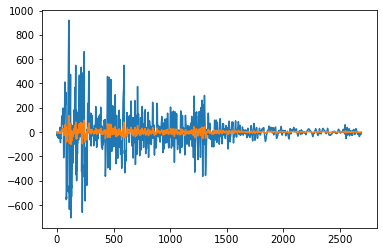

In [7]:
plt.plot(scaledrecord)
plt.plot(record[:,1])

### Response for Scaled Record - Spectra

In [8]:
D=[]
V=[]
A=[]
TN=[]

for k in range (200,500000,100):
    xi=0.05
    m=50
    wn = sqrt(k/m)
    Tn=2*np.pi/wn
    c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
    wd = wn*sqrt(1.0-xi**2.0)
    ##Newmark Beta Variables - Based on Linear Acceleration Method
    gamma = 1/2
    beta = 1/6
    T1=10 #duration of motion evaluation
    dt=0.002 #time step
    N=int(T1/dt) #total number of time points
    t=np.arange(0.0,T1,dt) #generate time vector
    f = np.zeros(N)
    Df = np.zeros(N)
    
    ## Initial Conditions
    f0=0 # magnitude of force
    u0=0 #initial displacement
    v0=0 # initial velocity
    a0=0
    ui=u0
    dudti=v0
    dudt2i=a0
    u = [u0]
    dudt = [v0]
    dudt2 = [a0]
    
    ## Newmark-Beta Method (Forced)
    Kbar = k + m/(beta*(dt**2)) + c*gamma/(beta*dt)

    for i in range (1,N):
        if i < (len(scaledrecord)-1):
            Dfi = -m * (scaledrecord[i]-scaledrecord[i-1])
        else:
            Dfi = 0
        DFbar = Dfi + ((m/(2*beta)) + c*dt*(1-gamma/(2*beta)))*dudt2i + ((1/(beta*dt))*m+(gamma/beta)*c)*dudti
        Dui = DFbar/Kbar
        Ddudt2i = (1/(beta*dt*dt))*Dui - (1/(beta*dt))*dudti - (1/(2*beta))*dudt2i
        Ddudti = dudt2i*dt+gamma*Ddudt2i*dt  
        ui = Dui + ui
        dudti = Ddudti + dudti
        dudt2i = Ddudt2i + dudt2i
        u.append(ui)
        dudt.append(dudti)
        dudt2.append(dudt2i)

    maxdisp=np.max(u)
    D.append(maxdisp)
    V.append(maxdisp*2*np.pi/Tn)
    A.append((maxdisp*((2*np.pi/Tn)**2)/32.174049/12))
    TN.append(Tn)

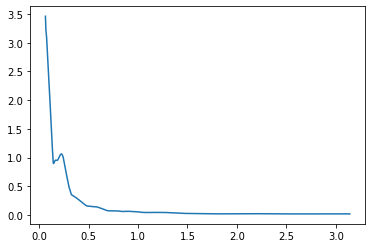

In [9]:
plt.plot(TN,A)

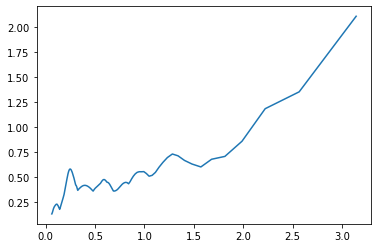

In [10]:
plt.plot(TN,D)

### Scaled Response in Time Domain

0.9999999999999307


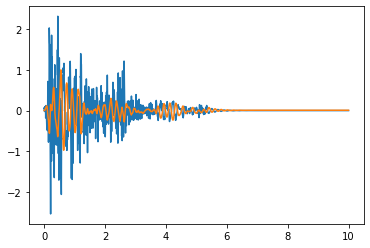

In [11]:
Tn=0.2
wn=2*np.pi/Tn
m=50
k=wn**2*m
xi=0.05
c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
wd = wn*sqrt(1.0-xi**2.0)

gamma = 1/2
beta = 1/6
T1=10 #duration of motion evaluation
dt=0.002 #time step
N=int(T1/dt) #total number of time points
t=np.arange(0.0,T1,dt) #generate time vector
f = np.zeros(N)
Df = np.zeros(N)

## Initial Conditions
f0=0 # magnitude of force
u0=0 #initial displacement
v0=0 # initial velocity
a0=0
ui=u0
dudti=v0
dudt2i=a0
u = [u0]
dudt = [v0]
dudt2 = [a0]

## Newmark-Beta Method (Forced)
Kbar = k + m/(beta*(dt**2)) + c*gamma/(beta*dt)

for i in range (1,N):
    if i < (len(scaledrecord)-1):
        Dfi = -m * (scaledrecord[i]-scaledrecord[i-1])
    else:
        Dfi = 0
    DFbar = Dfi + ((m/(2*beta)) + c*dt*(1-gamma/(2*beta)))*dudt2i + ((1/(beta*dt))*m+(gamma/beta)*c)*dudti
    Dui = DFbar/Kbar
    Ddudt2i = (1/(beta*dt*dt))*Dui - (1/(beta*dt))*dudti - (1/(2*beta))*dudt2i
    Ddudti = dudt2i*dt+gamma*Ddudt2i*dt  
    ui = Dui + ui
    dudti = Ddudti + dudti
    dudt2i = Ddudt2i + dudt2i
    u.append(ui)
    dudt.append(dudti)
    dudt2.append(dudt2i)

maxdisp=np.max(u)
Sds1=(maxdisp*((2*np.pi/Tn)**2))/32.174049/12
print(Sds1)
a=np.array(u)*((2*np.pi/Tn)**2)/32.174049/12
dudt2=np.array(dudt2)/32.174049/12
plt.plot(t,dudt2)
plt.plot(t,a)

    for i in range (N-1):
        if i < (len(record)-1):
            Dfi = -m * (record[i+1,1])
        else:
            Dfi = 0

        Fbar = Dfi + a1*u[i] + a2*dudt[i] + a3*dudt2[i]   
        u[i+1] = Fbar/Kbar
        dudt[i+1]=(gamma/(beta*dt))*(u[i+1]-u[i])+(1-gamma/beta)*dudt[i] + dt*(1-gamma/(2*beta))*dudt2[i]
        dudt2[i+1] = (1/(beta*dt**2))*(u[i+1]-u[i]) - (1/(beta*dt))*dudt[i] - ((1/(2*beta))-1)*dudt2[i]
        ui = u[i+1]
        dudti = dudt[i+1]
        dudt2i = dudt2[i+1]